In [38]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import os

In [182]:
path = 'Field_data/EPA_vesterbrogade_130623.csv'
df = pd.read_csv(path, sep = ';')
df = df.dropna()

df['Time'] = pd.to_timedelta(df['t_base'].str.split().str[1]).astype('timedelta64[s]')
# df['Time'] -= df['Time'][0]
#df['Time'] = pd.to_datetime(df['Time'].)
# df['Time'] = pd.to_datetime(df['Time'], unit='S')
# df['Time'] = pd.to_datetime(df['Time']).round('1s')
# df['Time'] = df['t_base'].dt.total_seconds()
# df = df.drop('t_base', axis = 'columns')

display(df)

,t_base,Total ion current,m/Q 4,m/Q 5,m/Q 6,m/Q 7,m/Q 8,m/Q 9,m/Q 10,m/Q 11,...,m/Q 297,m/Q 298,m/Q 299,m/Q 300,m/Q 301,m/Q 302,m/Q 303,m/Q 304,m/Q 305,Time
0,6/13/2023 06:37:08.344734,-430.645,-0.030554,-0.0130929,-0.0219008,0.0128636,-0.014584,0.003435,0.00681712,-0.00306746,...,-0.000327115,-0.00163436,-0.000571368,0.000183856,-0.000266045,0.000474191,0.000754002,-0.000627376,-0.000735509,23828.0
1,6/13/2023 06:37:48.346848,-213.803,0.008655,0.0167512,-0.0187638,-0.00803155,0.00359185,0.011341,0.00227908,-0.0120585,...,0.000290517,-0.000573645,-0.000199629,-0.000565254,0.000650664,"-9,66E+00",-0.000885251,"-3,95E-01",0.000267663,23868.0
2,6/13/2023 06:38:28.348961,-121.505,-0.035176,-0.000210072,-0.00739187,0.00591064,-0.00911262,0.000276325,-0.00349578,0.00413983,...,-0.000529346,-0.000802127,0.000326815,"-2,55E+00",0.000193102,-0.000270777,-0.000563939,-0.000185336,"-2,83E-01",23908.0
3,6/13/2023 06:39:08.351074,-765.681,0.002961,-0.0208177,-0.00654431,-0.00226081,-0.00172708,-0.0113603,0.00534267,-0.00153519,...,-0.000579465,-0.000754001,-0.000975055,0.000444085,0.00114906,0.000556883,"8,25E+00","-2,51E+00",0.000241996,23948.0
4,6/13/2023 06:39:48.353187,-527.627,0.007105,-0.01293,-0.010469,-0.000163516,-0.00363533,-0.00136641,-0.00095616,-0.00460301,...,-0.000492281,0.000612036,0.00107891,"-2,66E+00",0.00113907,0.000287419,0.000393244,"-8,29E+00",0.000304483,23988.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
453,6/13/2023 11:39:12.90086,541.634,-0.003248,-0.0255537,-0.0333667,-0.0110635,-0.0129668,0.00629734,0.0065056,-0.0123574,...,-0.000656501,-0.00058331,"-7,89E+00",0.00075576,-0.000194917,0.00194192,0.000190267,0.000450556,-0.000398248,41952.0
454,6/13/2023 11:39:52.902973,655.414,-0.032971,-0.0159822,-0.00444744,0.00329873,-0.000373758,0.0158177,0.0041369,0.000551383,...,0.000130683,0.000263942,0.000783435,-0.000495021,-0.00156512,0.000623662,0.00024453,-0.000466655,-0.000891477,41992.0
455,6/13/2023 11:40:32.905087,479.216,0.026546,0.00244057,0.00114523,0.00497459,-0.0091897,-0.0111633,-0.0144681,-0.0111167,...,0.000551857,-0.000365769,-0.000884212,-0.00155212,0.00131631,-0.000152175,0.00112214,-0.000549252,"-3,39E+00",42032.0
456,6/13/2023 11:41:12.907199,304.855,-0.020427,0.00595161,-0.0272165,-0.00800065,-0.011617,"-5,89E+00",-0.000704989,-0.00909751,...,0.00043622,0.000465382,-0.000253743,0.000461235,-0.000379742,0.000131758,0.00064635,-0.000226648,"-1,80E-01",42072.0


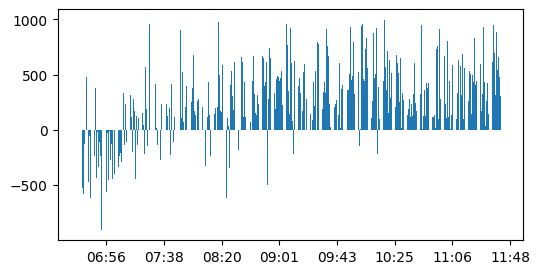

In [183]:
fig, ax = plt.subplots(figsize = (6, 3))

#df.plot(kind = "bar", ax=ax, x ="Time", y = "Total ion current")
ax.bar(df['Time'], df['Total ion current'], width = 30)

# from datetime import datetime
# labels = ax.get_xticklabels()
# print(labels[0])
# for idx, value in labels:
#     labels[idx] = datetime(value).strftime('%H:%M')
# ax.set_xticks(ax.get_xticks(), labels)
import time
from matplotlib.ticker import FuncFormatter
formatter = FuncFormatter(lambda s, x: time.strftime('%H:%M', time.gmtime(s)))
ax.xaxis.set_major_formatter(formatter)
#plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))

fig.savefig('test_plot.png', dpi = 600)